In [1]:
from LexAI.eurlex import Search

In [2]:
search=Search()

In [3]:
search.build_ms('agriculture')

MeiliSearchCommunicationError: MeiliSearchCommunicationError, HTTPConnectionPool(host='127.0.0.1', port=7700): Max retries exceeded with url: /indexes/eurlex/documents (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x114edc370>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [21]:
import pandas as pd

In [4]:
from LexAI.twitterAPI import twitter_query

In [103]:
tweets=twitter_query('agriculture',20)

In [104]:
tweets.dtypes

user               object
date               object
text               object
favorite_count      int64
user_loc           object
followers_count     int64
lang               object
user_desc          object
hashtags           object
dtype: object

In [107]:
tweets

,user,date,text,favorite_count,user_loc,followers_count,lang,user_desc,hashtags
0,moreaujb23,Tue Jun 01 06:33:16 +0000 2021,Ces gens sont nostalgiques d'une agriculture q...,910,Ceyroux,19625,fr,👨‍🌾🏛️Député paysan de la Creuse #LREM📣Porte-pa...,[]
1,SitaramYechury,Mon May 31 16:41:35 +0000 2021,British: Destruction of economy &amp; agricult...,308,,1043661,en,"Comrade, Communist Party of India (Marxist). F...",[]
2,lobs,Mon May 31 18:04:07 +0000 2021,Les scientifiques alertent : face au déclin de...,92,Paris,1443618,fr,Compte officiel de L'Obs 🗞️\nFacebook 👉 /lenou...,[]
3,Earthjustice,Mon May 31 13:00:01 +0000 2021,We’re suing the federal government for illegal...,162,Planet Earth,190549,en,Because the earth needs a good lawyer,[]
4,AP,Tue Jun 01 09:20:23 +0000 2021,Thousands of Australian meat workers had no wo...,126,Global,15163959,en,"News from The Associated Press, and a taste of...",[]
5,ValaAfshar,Mon May 31 00:57:59 +0000 2021,This farm produces 30X more food per acre than...,425,Boston,565345,en,Chief Digital Evangelist @Salesforce | Columni...,[]
6,PRupala,Mon May 31 13:19:27 +0000 2021,Attended the Introduction of new varieties of ...,143,"New Delhi, India",411137,en,Union Minister of the State - Agriculture & Fa...,[]
7,PatriceRoyTJ,Mon May 31 22:41:56 +0000 2021,Entassés dans des logements infestés de moisis...,71,"Mtl, Québec, Canada",138637,fr,"Chef d'antenne 17h RDI, TJ18h Radio-Canada, sp...",[]
8,StateHouseKenya,Mon May 31 11:06:34 +0000 2021,2/3 The two East African leaders announced ren...,179,Nairobi,1352643,en,,[]
9,CMOMaharashtra,Sun May 30 18:05:24 +0000 2021,The rains and the Kharif season are upon us. L...,446,"Mantralaya, Mumbai",2802420,en,Office of the Chief Minister of Maharashtra,[]


In [57]:
tweets['date']=pd.to_datetime(tweets['date']).dt.date

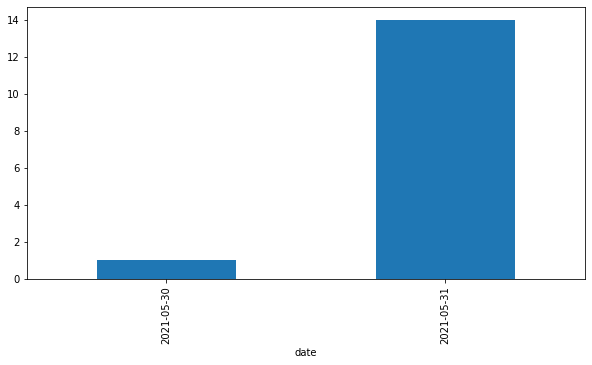

In [58]:
tweet_date = tweets.groupby(tweets['date'])['favorite_count'].count()
tweet_date.plot(kind='bar',figsize=(10,5));

In [97]:
most_tweets_loc=' '.join(tweets['user_loc']).lower().split()

In [102]:
from collections import Counter
counts = Counter(most_tweets_loc)
counts

Counter({'ceyroux': 1,
         'paris': 2,
         'planet': 1,
         'earth': 1,
         'boston': 1,
         'new': 1,
         'delhi,': 1,
         'india': 1,
         'mtl,': 1,
         'québec,': 1,
         'canada': 1,
         'nairobi': 1,
         'mantralaya,': 1,
         'mumbai': 1})

In [77]:
most_tweets_loc=pd.DataFrame(most_tweets_loc).reset_index()['index'][0].upper()

In [91]:
most_tweets_loc

'INDIA'

In [15]:
tweet_likes=tweets['favorite_count'].sum()
tweet_followers=tweets['followers_count'].sum()

In [88]:
tweet_likes

2121

In [17]:
tweet_followers

14535309

In [85]:
from fastapi import FastAPI
from fastapi.middleware.cors import CORSMiddleware
from LexAI.twitterAPI import twitter_query

#from predictions import get_prediction
#from consultations import get_consultation
#from twitterapi import get_tweet_volume

app = FastAPI()

app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],  # Allows all origins
    allow_credentials=True,
    allow_methods=["*"],  # Allows all methods
    allow_headers=["*"],  # Allows all headers
)

# Create root endpoint
@app.get("/")
def index():
    return {"greeting": "Hello Estefania"}

# Predict endpoint
@app.get("/predict")
def predict(keyword):
    #PSEUDO-CODE
    #Regulations list
        #regulations=get_regulation(keyword)
    #Consultations list
        #consultations=get_consultation(keyword)
    #Twitter list
    tweets=twitter_query(keyword,10)
    #tweet_likes=tweets['favorite_count'].sum()
    #tweet_followers=tweets['followers_count'].sum()
    #return regulations,consultations,tweet_volume

    # print keyword entered by user
    return tweets

In [86]:
predict('agriculture')

,user,date,text,favorite_count,user_loc,followers_count,lang,user_desc,hashtags
0,moreaujb23,Tue Jun 01 06:33:16 +0000 2021,Ces gens sont nostalgiques d'une agriculture q...,887,Ceyroux,19625,fr,👨‍🌾🏛️Député paysan de la Creuse #LREM📣Porte-pa...,[]
1,SitaramYechury,Mon May 31 16:41:35 +0000 2021,British: Destruction of economy &amp; agricult...,307,,1043649,en,"Comrade, Communist Party of India (Marxist). F...",[]
2,lobs,Mon May 31 18:04:07 +0000 2021,Les scientifiques alertent : face au déclin de...,92,Paris,1443614,fr,Compte officiel de L'Obs 🗞️\nFacebook 👉 /lenou...,[]
3,Earthjustice,Mon May 31 13:00:01 +0000 2021,We’re suing the federal government for illegal...,161,Planet Earth,190550,en,Because the earth needs a good lawyer,[]
4,ValaAfshar,Mon May 31 00:57:59 +0000 2021,This farm produces 30X more food per acre than...,424,Boston,565304,en,Chief Digital Evangelist @Salesforce | Columni...,[]
5,PRupala,Mon May 31 13:19:27 +0000 2021,Attended the Introduction of new varieties of ...,142,"New Delhi, India",411137,en,Union Minister of the State - Agriculture & Fa...,[]
6,PatriceRoyTJ,Mon May 31 22:41:56 +0000 2021,Entassés dans des logements infestés de moisis...,68,"Mtl, Québec, Canada",138633,fr,"Chef d'antenne 17h RDI, TJ18h Radio-Canada, sp...",[]
7,StateHouseKenya,Mon May 31 11:06:34 +0000 2021,2/3 The two East African leaders announced ren...,178,Nairobi,1352606,en,,[]
8,CMOMaharashtra,Sun May 30 18:05:24 +0000 2021,The rains and the Kharif season are upon us. L...,444,"Mantralaya, Mumbai",2802248,en,Office of the Chief Minister of Maharashtra,[]
9,Anne_Hidalgo,Mon May 31 15:42:09 +0000 2021,"Après Rouen et avant Paris cet automne, nous é...",132,Paris,1514292,fr,Maire de @Paris | Présidente de l'@AIMFrancoph...,[]
